AIRLINES DATA

Hierarchical Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [6]:
df=pd.read_csv('EastWestAirlines.csv')
df

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [8]:
df2=df.drop(['ID'],axis=1)
df2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [9]:
#Normalization using UDF
def norm(i):
  x=(i-i.min())/(i.max()-i.min())
  return(x)

In [10]:
df2n=norm(df2)
df2n

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


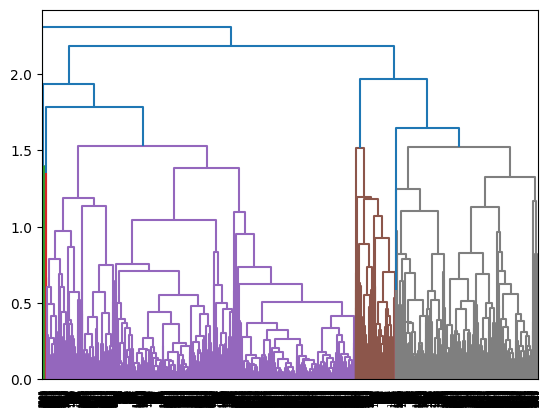

In [11]:
#Dendrogram
dendrogram=sch.dendrogram(sch.linkage(df2n,'complete'))

In [12]:
#creating clusters
c=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
c

AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [13]:
y=pd.DataFrame(c.fit_predict(df2n),columns=['cluster_id'])
y['cluster_id'].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


1    1011
0     946
2     808
4     699
3     535
Name: cluster_id, dtype: int64

In [14]:
#adding to df
df2['cluster_id']=c.labels_
df2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_id
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,4


In [15]:
df2.groupby('cluster_id').agg(['mean']).reset_index()

,cluster_id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,79848.233615,285.097252,1.699789,1.024313,1.000000,12079.774841,12.133192,781.939746,2.369979,4372.173362,1.0
1,1,43313.653808,21.506429,1.000000,1.033630,1.000989,2562.614243,5.474777,169.510386,0.523244,4940.680514,0.0
2,2,106221.111386,161.262376,3.198020,1.001238,1.025990,26458.257426,16.363861,198.733911,0.558168,4367.250000,0.0
3,3,127475.028037,160.801869,4.362617,1.000000,1.050467,58656.919626,22.235514,991.110280,3.005607,5072.226168,1.0
4,4,30013.416309,98.054363,1.000000,1.000000,1.000000,2552.569385,6.101574,340.274678,0.948498,1568.864092,0.0


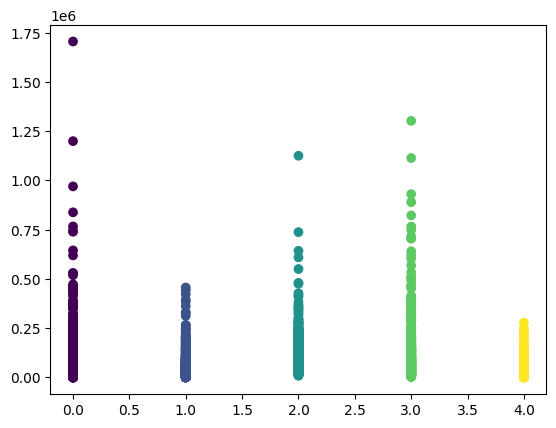

In [16]:
#plotting clusters
plt.scatter(df2['cluster_id'],df2['Balance'],c=c.labels_)

Normalizing the data with in-built normalize function

In [17]:
from sklearn.preprocessing import normalize

df3=df.drop(['ID'],axis=1)

df3n=pd.DataFrame(normalize(df3),columns=df3.columns)
df3n

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


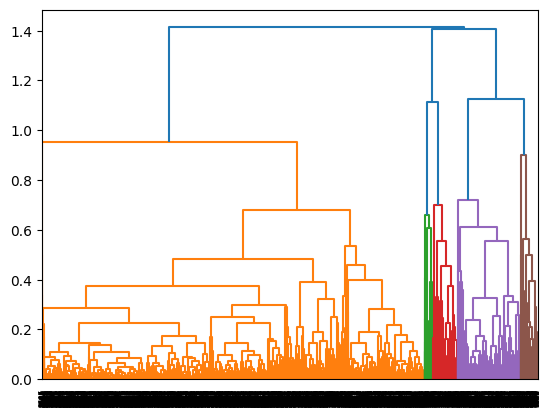

In [18]:
#Dendrogram
d=sch.dendrogram(sch.linkage(df3n,'complete'))

In [19]:
#creating clusters
c2=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
c2

AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [20]:
y=pd.DataFrame(c2.fit_predict(df3n),columns=['cluster_id'])
y['cluster_id'].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


2    1547
4    1191
3     579
1     453
0     229
Name: cluster_id, dtype: int64

In [21]:
#adding to df3
df3['cluster_id']=c2.labels_
df3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster_id
0,28143,0,1,1,1,174,1,0,0,7000,0,4
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,64385,0,1,1,1,981,5,0,0,1395,1,4
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,4


In [22]:
df3.groupby('cluster_id').agg(['mean']).reset_index()

,cluster_id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,5524.222707,8.755459,1.000000,1.000000,1.000000,584.532751,2.401747,66.982533,0.209607,4875.301310,0.131004
1,1,31066.514349,111.415011,3.200883,1.026490,1.070640,40266.935982,17.289183,626.754967,1.812362,4205.624724,0.858720
2,2,81201.080802,136.521008,2.115061,1.013575,1.000646,16350.149968,13.574014,488.550743,1.340659,4285.891403,0.312217
3,3,69569.894646,97.257340,3.326425,1.032815,1.022453,35743.675302,17.784111,406.804836,1.274611,4090.832470,0.525043
4,4,94957.590260,215.220823,1.141058,1.005038,1.002519,3524.928631,5.640638,461.104954,1.521411,3736.071369,0.230898


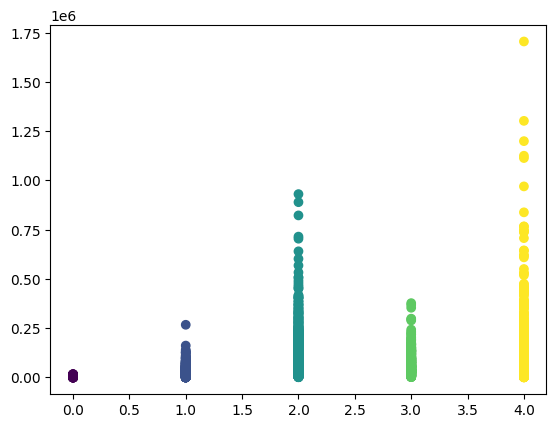

In [23]:
#plot clusters
plt.scatter(df3['cluster_id'],df3['Balance'], c=c2.labels_)

K means Clustering

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [26]:
df=pd.read_csv('EastWestAirlines.csv')
df

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [27]:
df2=df.drop(['ID'],axis=1)
df2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [29]:
#normalization using standard scaler
df2n=StandardScaler().fit_transform(df2)

In [30]:
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,random_state=0)
  kmeans.fit(df2n)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'WCSS')

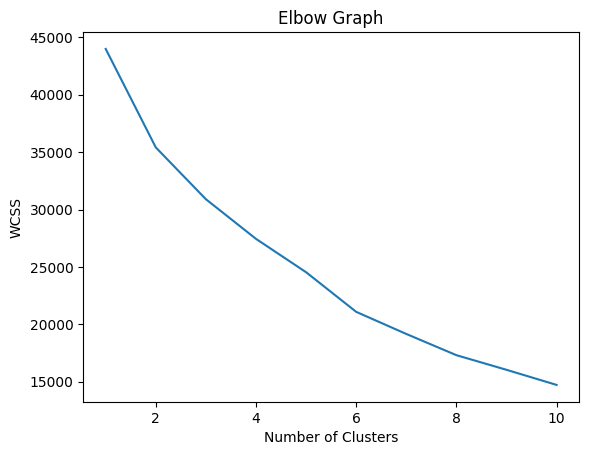

In [31]:
#plotting k values vs wcss for choosing K
plt.plot(range(1,11),wcss);
plt.title('Elbow Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

Cluster algorithm using K=4

In [32]:
c4=KMeans(4,random_state=30).fit(df2n)
c4

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=30)

In [33]:
c4.labels_

array([0, 0, 0, ..., 3, 0, 0], dtype=int32)

In [34]:
#Assign clusters to the data set
df3=df2.copy()
df3['clusters4_id']=c4.labels_
df3

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters4_id
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,3
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [35]:
#compute the centroids for K=4 clusters
c4.cluster_centers_

array([[-0.29584258, -0.0603903 , -0.60911906,  0.03222463, -0.06075301,
        -0.51562007, -0.48778976, -0.18468409, -0.19727389, -0.2065444 ,
        -0.34933297],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735],
       [ 1.19916278,  0.8413837 ,  0.07934291,  0.15576844, -0.06276658,
         0.61091878,  1.63802866,  3.57547132,  3.86140846,  0.28565421,
         0.91563614],
       [ 0.43059508,  0.0158422 ,  1.18872871, -0.08236624, -0.05476264,
         0.91116803,  0.74463543, -0.08026444, -0.09129375,  0.37198921,
         0.57588937]])

In [36]:
df3.groupby('clusters4_id').agg(['mean']).reset_index()

,clusters4_id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,43828.396152,97.283863,1.223007,1.019238,1.000393,4707.805654,6.926973,201.254417,0.624656,3693.855124,0.201413
1,1,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
2,2,194432.643750,794.981250,2.168750,1.037500,1.000000,31897.281250,27.331250,5465.837500,16.018750,4708.400000,0.812500
3,3,117087.423649,156.736883,3.697729,1.002349,1.001566,39200.451057,18.761942,348.499608,1.029757,4885.918559,0.649961


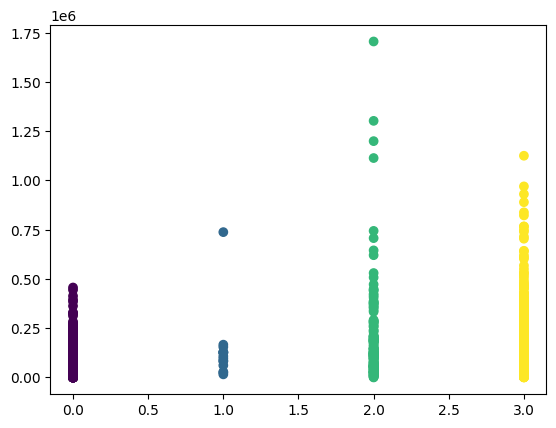

In [37]:
#plotting clusters
plt.scatter(df3['clusters4_id'],df3['Balance'],c=c4.labels_)

Clustering algorithm using K=5

In [38]:
c5=KMeans(5,random_state=30).fit(df2n)
c5

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=30)

In [39]:
c5.labels_

array([0, 0, 0, ..., 3, 0, 0], dtype=int32)

In [40]:
df4=df2.copy()
df4['clusters5_id']=c5.labels_
df4

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters5_id
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,3
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [41]:
#computing centroids
c5.cluster_centers_

array([[-2.97441370e-01, -6.26013958e-02, -6.09944285e-01,
        -9.82418871e-02, -6.07159307e-02, -5.21330789e-01,
        -5.01454441e-01, -1.87180704e-01, -1.99831577e-01,
        -2.10475283e-01, -3.52420208e-01],
       [ 1.14970340e+00,  1.06407580e+00,  1.02900923e-01,
        -9.82418871e-02, -6.27665798e-02,  5.78252911e-01,
         1.52034538e+00,  3.44900129e+00,  3.66768718e+00,
         2.64756357e-01,  8.99553448e-01],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
         1.71461374e+00,  3.32926913e-02,  5.96953922e-02,
         2.39872612e-01,  3.37527346e-01],
       [ 4.24748143e-01, -1.21396375e-02,  1.19282031e+00,
        -9.82418871e-02, -5.47249449e-02,  9.11488076e-01,
         7.40508649e-01, -9.38523027e-02, -1.02849450e-01,
         3.77190968e-01,  5.65958814e-01],
       [-4.68896637e-02, -1.56235600e-01, -6.68227273e-01,
         9.03825361e+00, -6.27665798e-02, -1.01665326e-01,
  

In [42]:
#grouping
df4.groupby('clusters5_id').agg(['mean']).reset_index()

,clusters5_id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,43669.876000,95.611600,1.221200,1.000000,1.000400,4568.151200,6.791600,197.838000,0.615200,3684.750400,0.200000
1,1,189448.964497,967.248521,2.201183,1.000000,1.000000,31108.467456,26.201183,5288.775148,15.284024,4665.248521,0.804734
2,2,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
3,3,116436.737421,134.935535,3.702830,1.000000,1.001572,39185.495283,18.721698,329.176101,0.985063,4897.754717,0.644654
4,4,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349


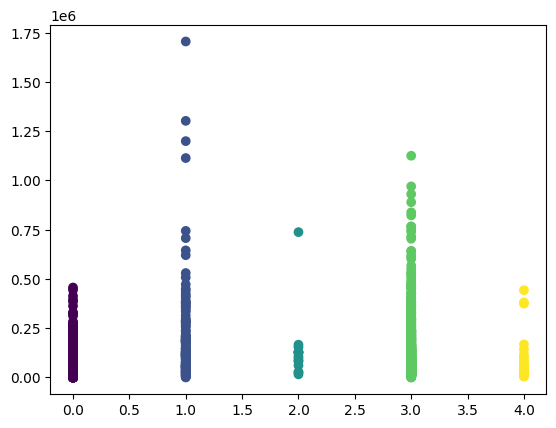

In [43]:
#ploting clusters
plt.scatter(df4['clusters5_id'],df4['Balance'], c=c5.labels_)

DBSCAN

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [45]:
df=pd.read_csv('EastWestAirlines.csv')
df

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [47]:
df2=df.drop(['ID'],axis=1)
df2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [48]:
#normalization using standard scaler
df2n=StandardScaler().fit_transform(df2)
df2n

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

Model 1

In [49]:
#DBScan Clustering
dbs=DBSCAN(eps=1,min_samples=4)
dbs.fit(df2n)

DBSCAN(eps=1, min_samples=4)

In [50]:
dbs.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [51]:
#adding clusters to df
df2['Clusters']=dbs.labels_
df2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [52]:
df2.groupby('Clusters').agg(['mean']).reset_index()

,Clusters,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,184694.319471,977.113422,2.763705,1.058601,1.092628,40964.655955,22.765595,2248.875236,6.516068,4754.215501,0.706994
1,0,53978.079794,5.088374,1.658945,1.000000,1.000000,9064.591163,8.487773,138.320463,0.434148,3802.836122,0.000000
2,1,62092.632969,9.785974,2.591985,1.000000,1.000000,22952.648452,12.862477,288.490893,0.913479,4511.039162,1.000000
3,2,34806.538462,0.000000,1.000000,2.000000,1.000000,8389.769231,12.000000,19.230769,0.153846,3186.153846,0.000000
4,3,202750.000000,0.000000,4.000000,1.000000,1.000000,43155.666667,20.333333,2456.666667,4.666667,4447.333333,0.000000
5,4,36413.428571,0.000000,1.000000,3.000000,1.000000,14341.142857,13.857143,57.142857,0.285714,3537.285714,0.000000
6,5,60932.000000,1794.500000,3.750000,1.000000,1.000000,39889.750000,16.250000,250.000000,0.750000,5029.000000,1.000000
7,6,164883.400000,1471.600000,1.000000,1.000000,1.000000,8472.800000,5.000000,300.000000,1.400000,4173.400000,1.000000
8,7,27113.888889,2475.444444,1.000000,1.000000,1.000000,2169.111111,4.555556,44.444444,0.333333,1900.111111,0.000000


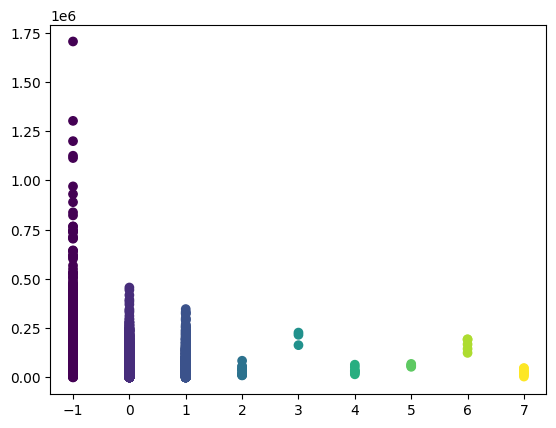

In [53]:
#plotting clusters
plt.scatter(df2['Clusters'],df2['Balance'],c=dbs.labels_)

Model has formed 7 clusters

Model 2

In [54]:
dbs2=DBSCAN()
dbs2.fit(df2n)

DBSCAN()

In [55]:
dbs2.labels_



array([ 0,  0,  0, ..., -1,  0,  0])

In [56]:
#adding clusters to df
df2['Clusters2']=dbs2.labels_
df2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters,Clusters2
0,28143,0,1,1,1,174,1,0,0,7000,0,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1,-1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,0


In [57]:
df2.groupby('Clusters2').agg(['mean']).reset_index()

,Clusters2,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,134500.365888,407.865534,2.685775,1.036801,1.034678,31603.530078,17.836518,1193.485492,3.496108,4690.736023,0.590234,0.060863
1,0,28053.443909,0.000000,1.000000,1.000000,1.000000,1946.549897,4.842395,57.693737,0.217481,3482.193393,0.000000,0.000000
2,1,29113.324627,0.000000,1.000000,1.000000,1.000000,3672.082090,4.929104,146.432836,0.470149,4031.078358,1.000000,1.000000
3,2,53130.400000,0.000000,2.000000,1.000000,1.000000,11096.400000,21.600000,50.000000,0.200000,6981.000000,0.000000,0.000000
4,3,50411.552632,0.000000,4.000000,1.000000,1.000000,37148.166667,15.342105,60.666667,0.210526,4715.043860,1.000000,1.000000
5,4,101333.108108,0.000000,4.000000,1.000000,1.000000,36288.072072,15.648649,20.720721,0.063063,4702.090090,0.000000,0.000000
6,5,75997.736170,0.000000,3.000000,1.000000,1.000000,17846.829787,14.663830,37.425532,0.131915,4040.851064,0.000000,0.000000
7,6,41971.895954,0.000000,3.000000,1.000000,1.000000,18654.855491,15.393064,42.196532,0.173410,4425.248555,1.000000,1.000000
8,7,138516.800000,0.000000,2.000000,1.000000,1.000000,8307.800000,11.600000,0.000000,0.000000,7823.200000,0.000000,0.000000


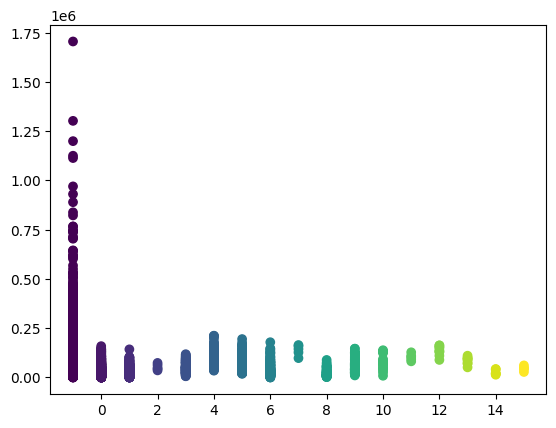

In [58]:
#plotting clusters
plt.scatter(df2['Clusters2'],df2['Balance'],c=dbs2.labels_)

Model has formed 15 clusters.

Models with fit predict method

Model 1

In [59]:
db=DBSCAN()
db.fit_predict(df2n)

array([ 0,  0,  0, ..., -1,  0,  0])

In [60]:
#silhouette score, it should be near to 1
from sklearn.metrics import silhouette_score as sil

sil(df2n,db.fit_predict(df2n))

-0.07834757831741163

Model 2

In [61]:
db1=DBSCAN(eps=3,min_samples=5)
db1.fit_predict(df2n)

array([0, 0, 0, ..., 0, 0, 0])

In [62]:
sil(df2n,db1.fit_predict(df2n))

0.5420774278401335

Model 3

In [63]:
db2=DBSCAN(eps=7,min_samples=5)
db2.fit_predict(df2n)

array([0, 0, 0, ..., 0, 0, 0])

In [64]:
sil(df2n,db2.fit_predict(df2n))

0.8562820070415407

Here the 3rd Model is the best among the 3